# **AIN 214 - PA5 - FALL 2024**




**Student Number** : 2220765041

**Name Surname**   : Sude Naz Öztürk


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 03.01.2025 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>



---


# **CLUSTERING**


This assignment aims to deepen your understanding of clustering algorithms and introduce the concept of dimensionality reduction using Principal Component Analysis (PCA). You will use K-Means and Agglomerative Clustering and explore the impact of PCA on these clustering techniques.

---
**Dataset Path:** "Data/wholesale_customers_data.csv"
---

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.

***Variables***

* FRESH: annual spending (m.u.) on fresh products (Continuous);
* MILK: annual spending (m.u.) on milk products (Continuous);
* GROCERY: annual spending (m.u.)on grocery products (Continuous);
* FROZEN: annual spending (m.u.)on frozen products (Continuous)
* DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
* DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
* CHANNEL: customers Channel - (Hotel/Restaurant/Cafe) (Nominal)
* REGION: customers Region  (Lisnon, Oporto or Other) (Nominal)




# **Necessary Imports**

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from kneed import KneeLocator


# **PART- 1: Data Preprocessing and Visualization (20 Pts)**

---

## 1.1. Explaratory Data Analysis (10 Pts)

* Analyze  the dataset and explain analysis results
* Check and handle missing values and outliers
* Transform raw data into a format suitable for ML algorithms: PCA, and clustering, such as normalization.



In [3]:
# Load the dataset
first_df = pd.read_csv('Data/wholesale_customers_data.csv')
first_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
first_df.describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
# Check missing values
print(first_df.isnull().sum())

# There is no missing values in this dataset.

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


Number of outliers in Fresh feature: 20
Number of outliers in Milk feature: 28
Number of outliers in Grocery feature: 24
Number of outliers in Frozen feature: 43
Number of outliers in Detergents_Paper feature: 30
Number of outliers in Delicassen feature: 27
Total Number of numerical outliers: 108
Numerical Outliers: [2, 4, 17, 22, 23, 24, 28, 29, 36, 38, 39, 40, 43, 45, 47, 49, 52, 56, 61, 65, 70, 71, 72, 73, 77, 85, 86, 87, 88, 91, 92, 93, 103, 109, 112, 125, 126, 129, 143, 145, 155, 163, 171, 173, 176, 181, 183, 195, 196, 200, 201, 202, 205, 209, 211, 216, 218, 230, 239, 240, 251, 254, 258, 259, 265, 277, 282, 283, 284, 285, 287, 289, 303, 304, 309, 310, 312, 319, 325, 328, 331, 333, 334, 337, 338, 339, 343, 349, 351, 358, 370, 371, 372, 377, 381, 384, 393, 401, 406, 409, 411, 413, 425, 427, 431, 435, 436, 437]


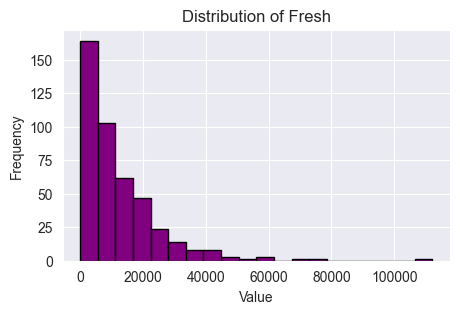

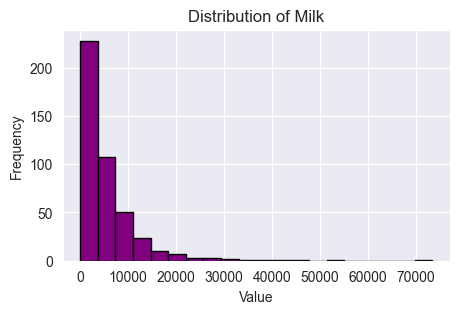

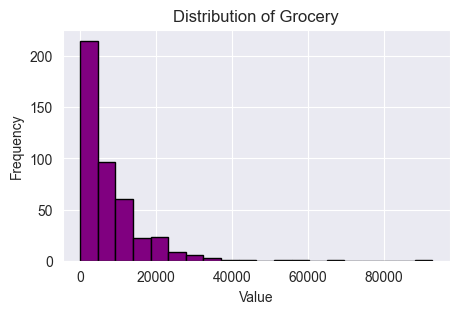

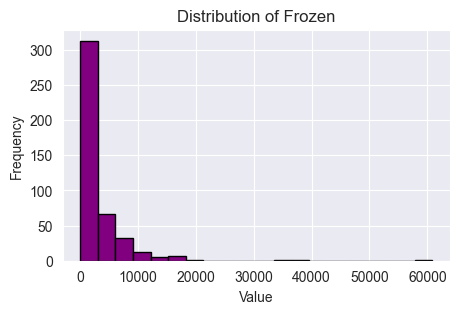

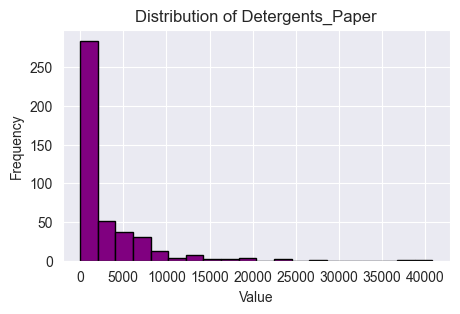

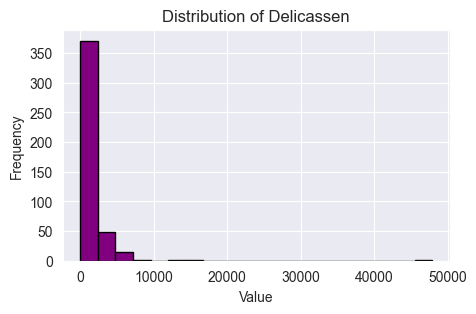

In [6]:
# Detect outliers in numerical features
# I use IQR method for outlier detection for numerical values
# Plots have asymmetric distribution because of that I use IQR method. Also, IQR is a basic method to find outliers.

numerical_outliers = []
numerical_col = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Function to find outliers in a feature
def outlier_finder(feature):
    outliers_of_feature = []
    Q1 = first_df[feature].quantile(0.25)
    Q3 = first_df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = first_df[(first_df[feature] < lower) | (first_df[feature] > upper)]
    outliers_of_feature.extend(outliers.index)

    return outliers_of_feature

# Loop through numerical columns to find outliers for each
for feature in numerical_col:
    feature_outliers = outlier_finder(feature)
    print(f"Number of outliers in {feature} feature: {len(feature_outliers)}")
    numerical_outliers.extend(feature_outliers)

# Delete duplicates
numerical_outliers = list(set(numerical_outliers))

numerical_outliers.sort()

print("Total Number of numerical outliers:", len(numerical_outliers))
print("Numerical Outliers:", numerical_outliers)

# Plot histograms for each numerical feature
for feature in numerical_col:
    first_df[feature].hist(bins=20, color='purple', edgecolor='k', figsize=(5, 3))
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


In [7]:
# Outlier Detection in categorical values

cat_outliers = []

categorical_col = ['Channel', 'Region']

# Calculate the lower threshold according to %5 of total data
lower_threshold = 22

def outlier_finder2(feature):
    outliers_of_feature = []
    counts = first_df[feature].value_counts()

    outlier_categories = counts[counts < lower_threshold].index

    outliers = first_df[first_df[feature].isin(outlier_categories)].index
    outliers_of_feature.extend(outliers)

    return outliers_of_feature

channel_outliers = outlier_finder2('Channel')
print("Number of outlier in channel feature: ", len(channel_outliers))
cat_outliers.extend(channel_outliers)


region_outliers = outlier_finder2('Region')
print("Number of outlier in region feature: ", len(region_outliers))
cat_outliers.extend(region_outliers)

cat_outliers = sorted(set(cat_outliers))

print("Total number of categorical outliers: ",len(cat_outliers))
print("Categorical Outliers:", cat_outliers)

# There is no outlier in categorical features.

Number of outlier in channel feature:  0
Number of outlier in region feature:  0
Total number of categorical outliers:  0
Categorical Outliers: []


In [8]:
# Outlier Handling

# About 35% of the data consists of outliers because of that removing outliers is not a good choice. Data has a skewed distribution, most of the data is numerical and too many outliers in data. Because of these, median imputation can be more appropriate for this dataset. Also, for categorical outliers I will use Mode Imputation.

# Median Imputation
df_median_imputed = first_df.copy()

for feature in numerical_col:

    median_value = first_df[feature].median()
    df_median_imputed.loc[numerical_outliers, feature] = int(median_value)


for feature in categorical_col:

    mode_value = first_df[feature].mode()[0]
    df_median_imputed.loc[cat_outliers, feature] = mode_value



In [9]:
# Normalization

scaler = MinMaxScaler()
normalized_data_median = scaler.fit_transform(df_median_imputed)

# After normalization, dataframe's structure is chancing, so I redefined all the columns.
columns = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
           'Delicassen']

scaled_df_median = pd.DataFrame(normalized_data_median, columns=columns)


## 1.2. Data Visualization (10 Pts)

* Visualize the distribution of features
* Plot a correlation heatmap to analyze their relationships.
* Comment on any findings

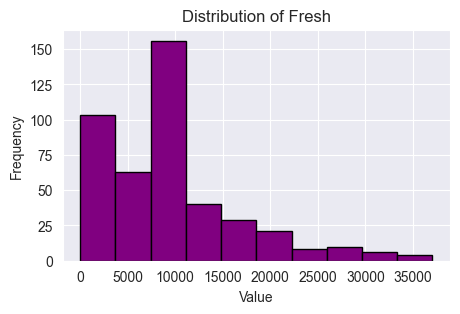

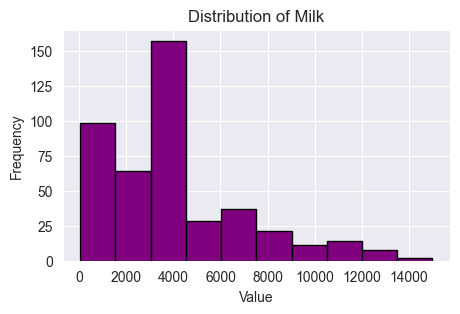

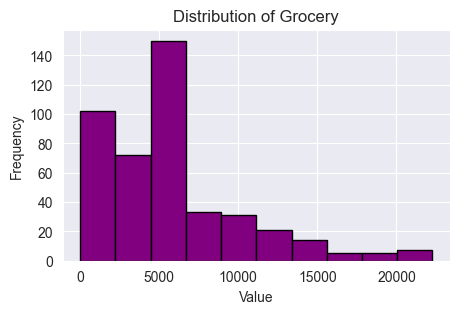

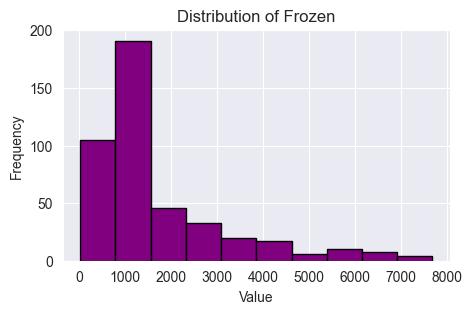

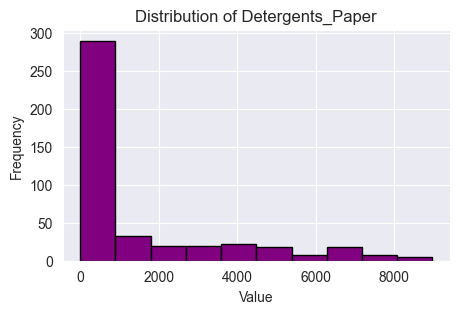

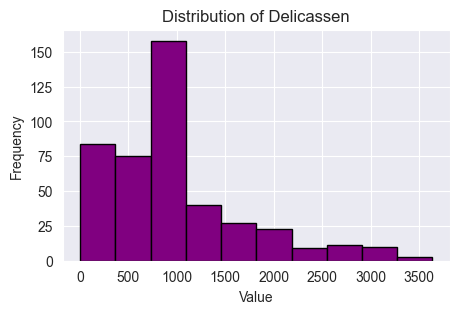

In [10]:
# Visualize the distribution of numerical features

for feature in numerical_col:
    df_median_imputed[feature].hist(bins=10, color = 'purple', edgecolor='k', figsize=(5,3))
    plt.title('Distribution of {}'.format(feature))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


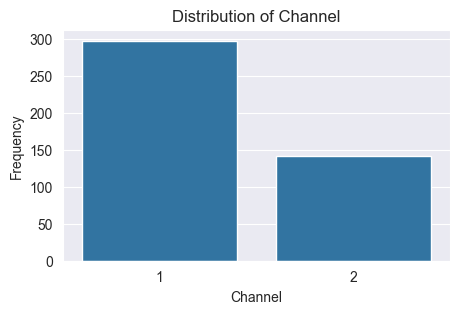

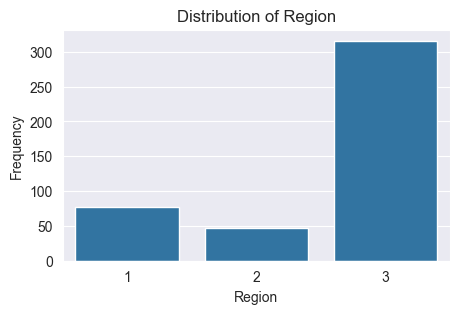

In [11]:
# Visualize the distribution of categorical features

plt.figure(figsize=(5, 3))
sns.countplot(x='Channel', data=df_median_imputed)
plt.title('Distribution of Channel')
plt.xlabel('Channel')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(x='Region', data=df_median_imputed)
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

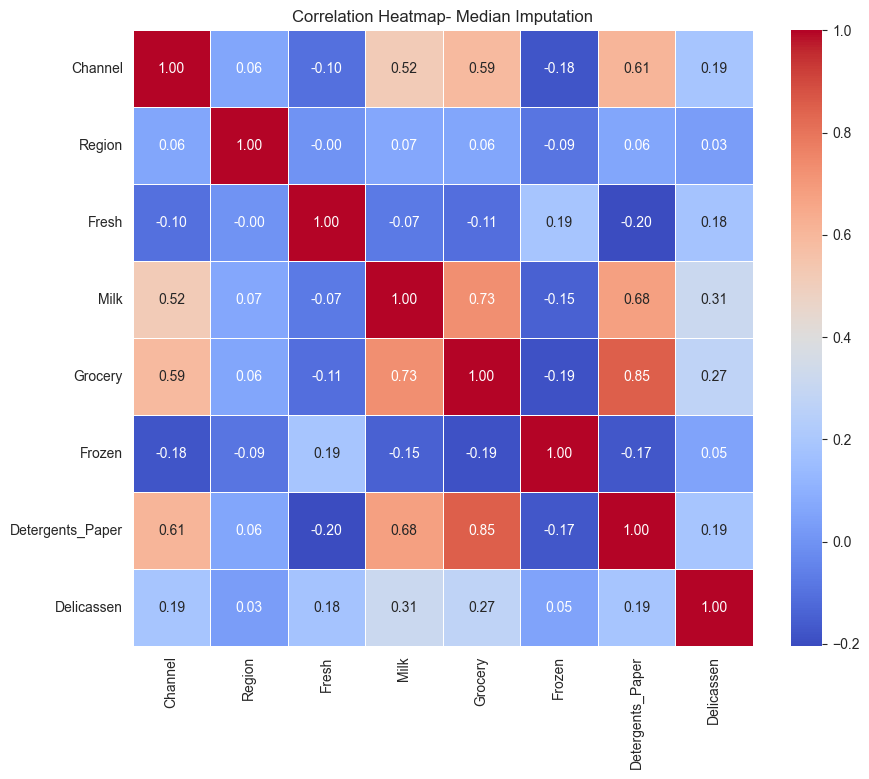

In [12]:
# Plot a correlation heatmap to analyze their relationships.

corr_matrix = scaled_df_median.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap- Median Imputation")
plt.show()


# **PART- 2: Clustering on the Original Dataset (30 points)**



## 2.1 K-Means Clustering on the Original Dataset (15 points)

* Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.


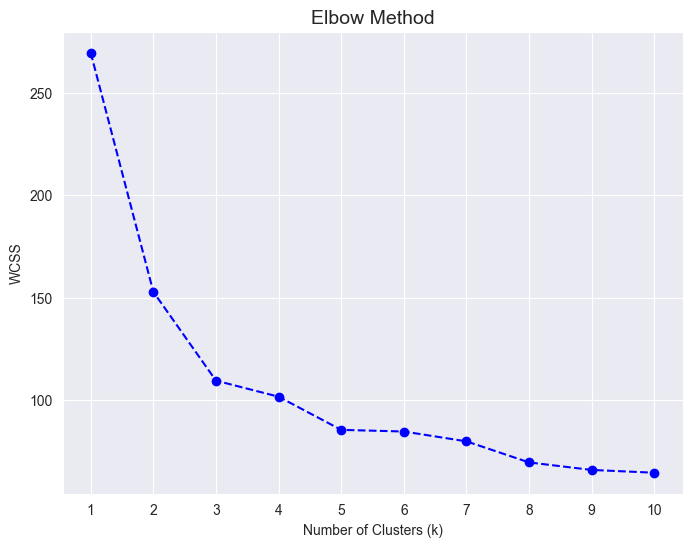

Optimal k: 3


In [13]:
wcss_median = []

for k in range(1, 11):  # Test k values from 1 to 10
    kmeans_median = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_median.fit(scaled_df_median)
    wcss_median.append(kmeans_median.inertia_)

# Elbow graph to find optimal k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss_median, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method', fontsize=14)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Determine optimal k with KneeLocator
kneedle = KneeLocator(range(1, 11), wcss_median, curve="convex", direction="decreasing")
print(f"Optimal k: {kneedle.knee}")


## 2.2. Hierarchical Agglomerative Clustering (HAC) on the Original Dataset (15 points)

* Apply HAC on the dataset, visualize the dendogram. Then, comment on whether the dendogram agrees with the clusters obtained by K-Means. Try with 2 different linkage methods.

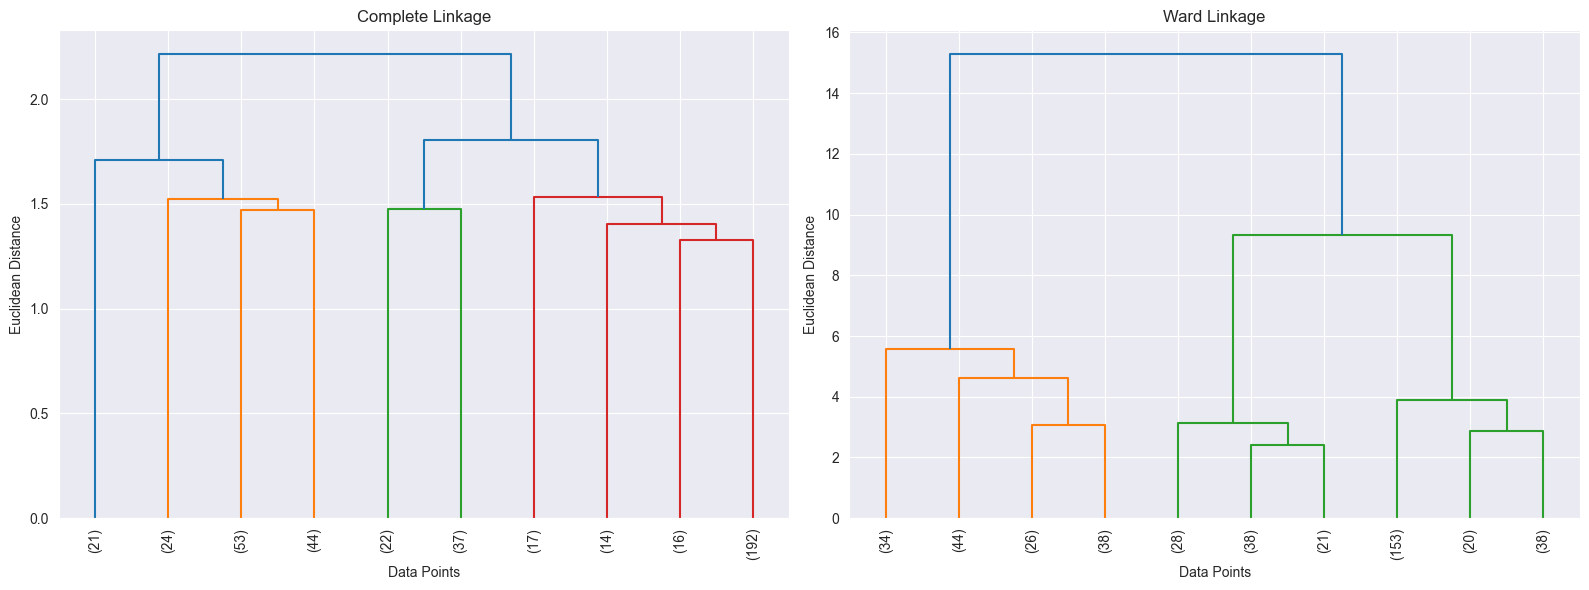

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_methods = ["complete", "ward"]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i, method in enumerate(linkage_methods):
    linkage_median = linkage(scaled_df_median, method=method)
    dendrogram(linkage_median, truncate_mode="lastp", p=10, leaf_rotation=90, leaf_font_size=10, ax=axes[i])
    axes[i].set_title(f"{method.capitalize()} Linkage")
    axes[i].set_xlabel("Data Points")
    axes[i].set_ylabel("Euclidean Distance")

plt.tight_layout()
plt.show()



I find that Ward Linkage produces more balanced and compact clusters, making it a better choice for most applications, especially when the data is expected to have distinct and tight clusters. On the other hand, I think Complete Linkage might be useful if the goal is to avoid merging clusters that have even a single large outlier.
In conclusion, I prefer Ward Linkage in this case, as it likely results in more meaningful and well-separated clusters.

# **PART- 3: Dimensionality Reduction (30 points)**

### *What is Dimensionality Reduction and Why is it Used?*

Dimensionality reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It is an attempt to reduce the complexity of the task as an attempt to remove the curse of dimensionality - also for visualization purposes.

### *Principal Component Analysis (PCA)*

PCA is a technique that transforms original correlated features into new uncorrelated features (principal components) based on variance. **Process:**

* **Linear Combinations of Features:** PCA begins by creating linear combinations of the existing features in the dataset.
* **First Principal Component:** The first principal component (PC1) is the linear combination that captures the highest variance in the dataset. Mathematically, this is the direction in which the data varies the most.
* **Subsequent Principal Components:** Each following principal component is the linear combination of features that captures the highest variance possible while being orthogonal (perpendicular) to all previously determined principal components. This ensures that each new principal component adds unique information.
* **Covariance Matrix and Eigenvectors:** The process of finding these principal components corresponds to computing the eigenvectors of the covariance matrix of the data. The covariance matrix encapsulates how each pair of variables in the dataset co-varies.
* **Eigenvalues:** The eigenvalues associated with each eigenvector (principal component) indicate the amount of variance that the principal component explains. Larger eigenvalues mean more variance explained.


***You can use scikit-learn***




## 3.1. Apply PCA (15 Pts)

* Normalize the data
* Apply PCA to the normalized data using scikit-learn
* Visualize the data with the first two principal components (PC) as the axes. Do you see any clusters?
* Components selection: Visualize the variance explained by each PC. Then choose the number of components that explain the data sufficiently enough.
* Comment on any findings

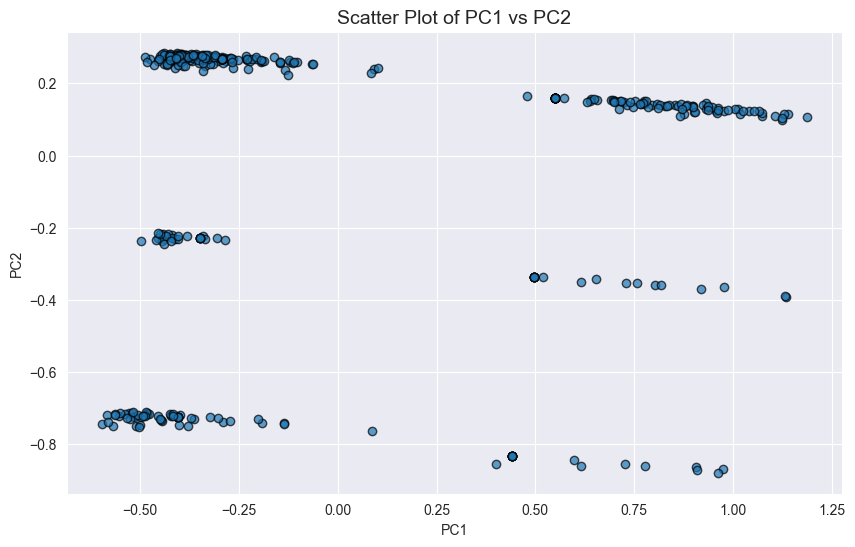

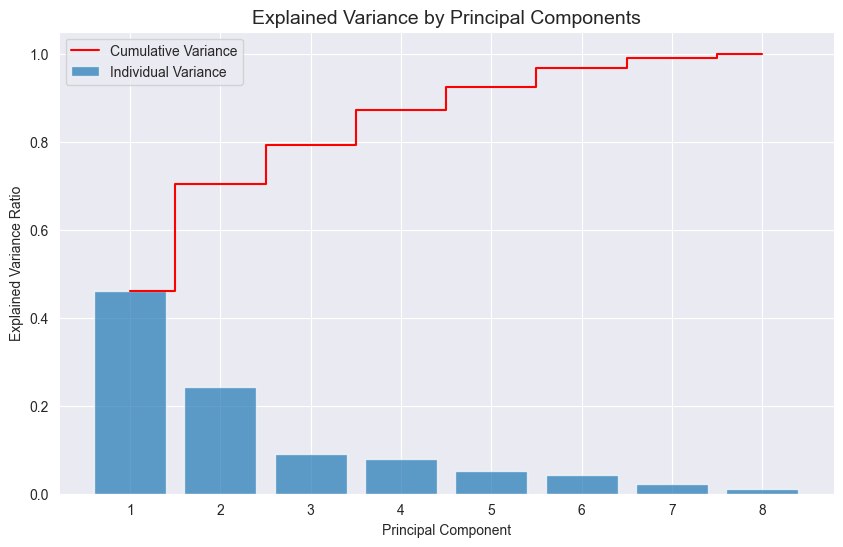

Number of components to explain at least %95 variance: 6


In [15]:
# Applying PCA
pca = PCA()
pca_transformed_median = pca.fit_transform(scaled_df_median)

# Plot of PC1 and PC2
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed_median[:, 0], pca_transformed_median[:, 1], alpha=0.7, edgecolor='k')
plt.title('Scatter Plot of PC1 vs PC2', fontsize=14)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# Calculating explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual Variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', color='red', label='Cumulative Variance')
plt.title('Explained Variance by Principal Components', fontsize=14)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

# Selecting the minimum number of components to explain at least 95% variance
sufficient_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components to explain at least %95 variance: {sufficient_components}")



The scatter plot of PC1 and PC2 indicates that the data may have clusters, and these components capture most of the variance in a 2D representation.
The bar plot and cumulative variance line show how the variance is distributed across the principal components. In this case, the first six components explain approximately 95% of the total variance. Additionally, 2 components cover the majority of the data, so silhoutte scores should be tried for the number of components 2 and 6.

## 3.2. K-means Clustering with PCA (15 Pts)
* Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.

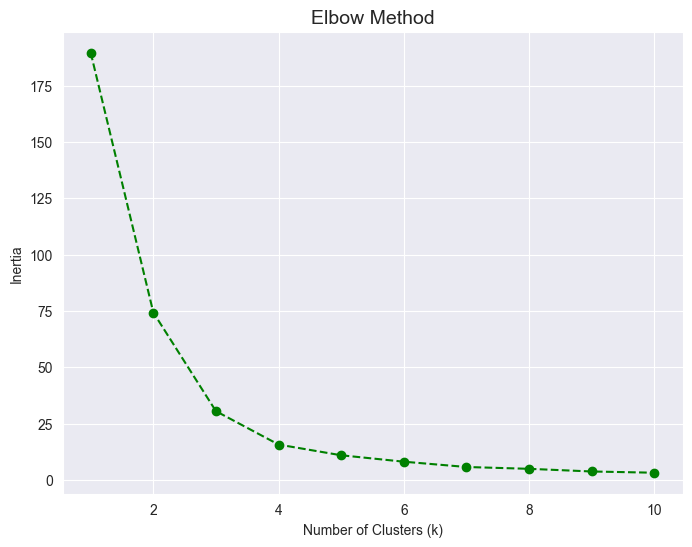

Optimal k: 3


In [16]:
# Compute inertia for the elbow method
k_values = range(1, 11)
inertia_median = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_transformed_median[:, :2])  # First 6 component
    inertia_median.append(kmeans.inertia_)

# Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_median, marker="o", linestyle="--", color="g")
plt.title("Elbow Method", fontsize=14)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Determine optimal k
kneedle = KneeLocator(range(1, 11), inertia_median, curve="convex", direction="decreasing")
print(f"Optimal k: {kneedle.knee}")


# **PART- 4: Evaluate the Clustering Results (20 points)**

* Evaluate and compare the clustering results (k means with and without PCA) using the Silhouette Coefficients.

* Identify which clustering method and dataset version (original vs. PCA-reduced) resulted in the best clustering.

* Discuss the impact of dimensionality reduction (PCA) on clustering performance.

* Highlight any differences in performance between K-Means and Agglomerative Clustering.

In [17]:
# Components to compare
components_to_compare = [2, 6]
k_values = [3, 4] # Optimal k is 3 on some models and 4 on some models, so both will be tried

# Dictionary to store results for both component sizes
comparison_results = {}

for components in components_to_compare:
    results = {}
    for k in k_values:
        # K-Means - Original
        kmeans_original = KMeans(n_clusters=k, random_state=42)
        kmeans_original_labels = kmeans_original.fit_predict(scaled_df_median)
        silhouette_original = silhouette_score(scaled_df_median, kmeans_original_labels)

        # K-Means - PCA
        kmeans_pca = KMeans(n_clusters=k, random_state=42)
        kmeans_pca_labels = kmeans_pca.fit_predict(pca_transformed_median[:, :components])
        silhouette_pca = silhouette_score(pca_transformed_median[:, :components], kmeans_pca_labels)

        # Agglomerative Clustering - Original
        agg_clustering_original = AgglomerativeClustering(n_clusters=k, linkage="ward")
        agg_original_labels = agg_clustering_original.fit_predict(scaled_df_median)
        silhouette_agg_original = silhouette_score(scaled_df_median, agg_original_labels)

        # Agglomerative Clustering - PCA
        agg_clustering_pca = AgglomerativeClustering(n_clusters=k, linkage="ward")
        agg_pca_labels = agg_clustering_pca.fit_predict(pca_transformed_median[:, :components])
        silhouette_agg_pca = silhouette_score(pca_transformed_median[:, :components], agg_pca_labels)

        results[k] = {
            "KMeans Original": silhouette_original,
            "KMeans PCA": silhouette_pca,
            "Agglomerative Original": silhouette_agg_original,
            "Agglomerative PCA": silhouette_agg_pca,
        }
    comparison_results[components] = results

# Prepare the comparison results in a structured way
comparison_list = []

for components, results in comparison_results.items():
    for k, scores in results.items():
        for method, score in scores.items():
            comparison_list.append({
                "Components": components,
                "k": k,
                "Method": method,
                "Silhouette Score": score
            })

comparison_df_fixed = pd.DataFrame(comparison_list)

# Display the results
print(comparison_df_fixed)

    Components  k                  Method  Silhouette Score
0            2  3         KMeans Original          0.430273
1            2  3              KMeans PCA          0.719778
2            2  3  Agglomerative Original          0.430273
3            2  3       Agglomerative PCA          0.723753
4            2  4         KMeans Original          0.351731
5            2  4              KMeans PCA          0.745073
6            2  4  Agglomerative Original          0.421099
7            2  4       Agglomerative PCA          0.745073
8            6  3         KMeans Original          0.430273
9            6  3              KMeans PCA          0.449450
10           6  3  Agglomerative Original          0.430273
11           6  3       Agglomerative PCA          0.449450
12           6  4         KMeans Original          0.351731
13           6  4              KMeans PCA          0.362703
14           6  4  Agglomerative Original          0.421099
15           6  4       Agglomerative PC

* Best models are k=4 KMeans PCA and Agglomerative PCA models, both achieving a 0.745 silhouette score, followed closely by k=3 Agglomerative PCA with 0.7237.

* Original vs. PCA-reduced: PCA, especially when using 2 components, significantly improves the performance of both KMeans and Agglomerative Clustering by reducing noise and emphasizing the most important information. For k=3 and k=4, the silhouette scores obtained with PCA are much higher compared to the original data. However, when using 6 components, this advantage diminishes, and the scores are close to the original data (e.g., KMeans PCA: 0.4495 and Agglomerative PCA: 0.4495 for k=3).

* Impact of PCA: Dimensionality reduction with PCA significantly improves clustering performance when 2 components are used, as it reduces noise and highlights important features. For k=3 and k=4, PCA increases silhouette scores substantially compared to the original data (e.g., Agglomerative PCA: 0.7237 vs. 0.4303 for k=3). However, with 6 components, the scores are similar to the original data, as unnecessary dimensions reintroduce noise (e.g., KMeans PCA: 0.4495 vs. 0.4303 for k=3).

* Kmeans vs Agglomerative: KMeans and Agglomerative Clustering both benefit significantly from PCA, especially with 2 components, showing substantial improvement in silhouette scores. For k=3, Agglomerative PCA achieves a slightly higher score (0.7237) compared to KMeans PCA (0.7198).
For k=4, both methods achieve identical scores (0.745). KMeans is better suited for datasets where PCA is applied, but Agglomerative Clustering also shows significant improvement with PCA and performs equally well in some cases.







# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw5.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.